In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv('Car details v3.csv')
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
cars.dtypes

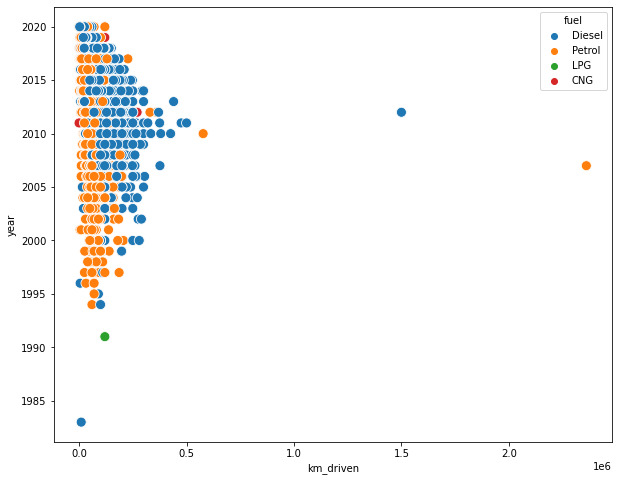

In [10]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(data=cars, x="km_driven", y="year",hue='fuel',s=100)

In [14]:
cars1=cars[['km_driven','year']]
cars1

,km_driven,year
0,145500,2014
1,120000,2014
2,140000,2006
3,127000,2010
4,120000,2007
...,...,...
8123,110000,2013
8124,119000,2007
8125,120000,2009
8126,25000,2013


In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(cars1)
print('cluster_centers: ',kmeans.cluster_centers_)
print('labels_ :',kmeans.labels_)

cluster_centers:  [[  68433.24040596    2013.07643514]
 [ 216392.51535836    2010.3003413 ]
 [  24833.48743017    2016.42178771]
 [1930228.5           2009.5       ]
 [ 117475.99394273    2011.50881057]]
labels_ : [4 4 4 ... 4 2 2]


Text(0, 0.5, 'year')

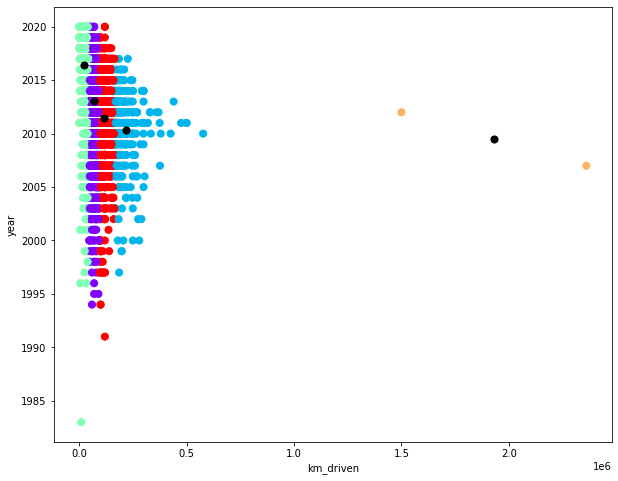

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(cars1['km_driven'],cars1['year'],c=kmeans.labels_,cmap='rainbow',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',s=50)
plt.xlabel('km_driven',fontsize=10)
plt.ylabel('year',fontsize=10)

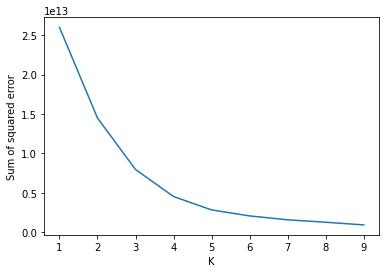

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cars[['km_driven','year']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [30]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(cars1)
print('cluster_centers: ',kmeans.cluster_centers_)
print('labels_ :',kmeans.labels_)

cluster_centers:  [[ 44546.9          2014.88410714]
 [125803.14240506   2011.41139241]]
labels_ : [1 1 1 ... 1 0 0]


Text(0, 0.5, 'year')

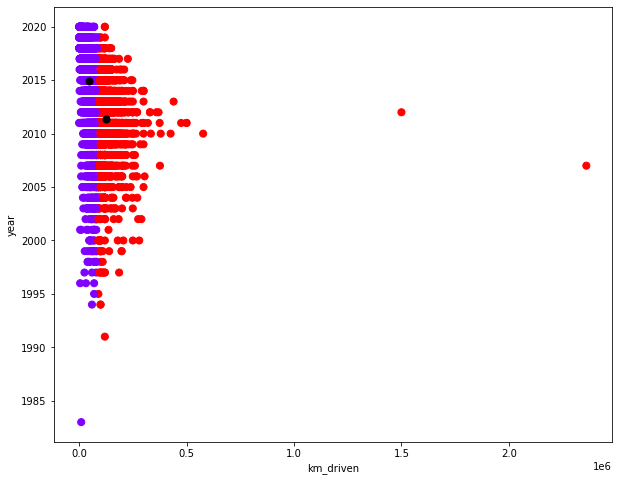

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(cars1['km_driven'],cars1['year'],c=kmeans.labels_,cmap='rainbow',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',s=50)
plt.xlabel('km_driven',fontsize=10)
plt.ylabel('year',fontsize=10)